In [19]:
import pandas as pd
!pip install polars
import polars as pl
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\asus\Documents\Candidate_sample- IT analyst -v2.xlsx")

# Converting excel file into a pandas dataframe

In [20]:
df = pl.from_pandas(df)
df

# Creating a dataframe - the table below

Group,Site,Category,Supplier,Sum of Jan-24,Sum of Feb-24,Sum of Mar-24,Sum of Apr-24,Sum of May-24,Sum of Jun-24,Total 6 months,AVG per month,average occupancy/ residents,Budgeted spend (£/resident/day),Actual spend,variance £,variance %
str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Cr""","""1-Anc""","""Dairy""","""Freshways""",656.2,687.2,851.0,687.96,687.57,835.76,4405.69,734.281667,null,null,null,null,null
"""Cr""","""1-Anc""","""Grocery""","""Bidfood""",3646.57,3158.4,3280.34,4073.71,3006.42,3212.38,20377.82,3396.303333,null,null,null,null,null
"""Cr""","""1-Anc""","""Meat""","""Campbells Brothers-New""",896.82,691.69,750.66,920.85,723.01,809.09,4792.12,798.686667,null,null,null,null,null
"""Cr""","""1-Anc Total""",null,null,5199.59,4537.29,4882.0,5682.52,4417.0,4857.23,29575.63,4929.271667,39.0,3.85,null,null,null


In [23]:
df.columns = [col.rstrip() for col in df.columns]
df_june = df.select(pl.col("Category","Supplier", "Sum of Jun-24", "Total 6 months", "AVG per month", "Budgeted spend (£/resident/day)", "Actual spend", "average occupancy/ residents"))
df_june = df_june.rename({ "Budgeted spend (£/resident/day)": "Budgeted spend per day £", "average occupancy/ residents" : "num of residents"})
df_june

# I updated the column names in the DataFrame to remove any trailing spaces. 
# This ensures that there are no extra spaces in the column names, which could cause issues when referencing them later.
# I selected the columns that I thought were relevant to compute analysis on.

Category,Supplier,Sum of Jun-24,Total 6 months,AVG per month,Budgeted spend per day £,Actual spend,num of residents
str,str,f64,f64,f64,f64,f64,f64
"""Dairy""","""Freshways""",835.76,4405.69,734.281667,null,null,null
"""Grocery""","""Bidfood""",3212.38,20377.82,3396.303333,null,null,null
"""Meat""","""Campbells Brothers-New""",809.09,4792.12,798.686667,null,null,null
null,null,4857.23,29575.63,4929.271667,3.85,null,39.0


In [25]:
df_largest_food_cost = df_june.sort("Sum of Jun-24", descending = True)
df_largest_food_cost_june = df_largest_food_cost.select(pl.col("Category", "Supplier", "Sum of Jun-24"))
df_largest_food_cost_june
# The lowest food cost in june was £809.09 in the Meat category with supplier Campbells Brotheres-New
# To negoatiate for low prices - Campbells Browthers-New may be the best option

                                          

Category,Supplier,Sum of Jun-24
str,str,f64
null,null,4857.23
"""Grocery""","""Bidfood""",3212.38
"""Dairy""","""Freshways""",835.76
"""Meat""","""Campbells Brothers-New""",809.09


In [27]:
meat_price = df_largest_food_cost_june.filter(
                        pl.col("Category") == "Meat"
                        
)["Sum of Jun-24"].item()

dairy_price = df_largest_food_cost_june.filter(
                        pl.col("Category") == "Dairy"
                        
)["Sum of Jun-24"].item()


meat_dairy_pct_change = ((meat_price - dairy_price) /dairy_price) * 100
meat_dairy_pct_change

# I created a variable, meat_price, which extracts the total expenditure for the "Meat" category.
# Similarly, I created a variable, dairy_price, which extracts the total expenditure for the "Dairy" category.
# You calculated the percentage change between the meat and dairy prices using the formula:
# Percentage Change =(Meat Price−Dairy Price / Dairy Price) × 100
# This calculation determines how much more (or less) expensive meat is compared to dairy as a percentage of the dairy price.
# dairy is 3% more expensive than meat

-3.19110749497459

In [29]:
grocery_price = df_largest_food_cost_june.filter(
                    pl.col("Category") == "Grocery" 
)["Sum of Jun-24"].item()

meat_grocery_pct_change = ((meat_price - grocery_price) / grocery_price) * 100
meat_grocery_pct_change
# I created a variable, dairy_price, which extracts the total expenditure for the "Dairy" category.
# I calculated the percentage change between the meat and dairy prices using the formula:
# Percentage Change =(Meat Price−Grocery Price / Grocery Price) × 100
# This calculation determines how much more (or less) expensive meat is compared to Grocery as a percentage of the Grocery price.
# grocery is 74% more expxensive than meat


-74.8133782429227

In [60]:
# find cost per day
# sum of june / 30 = cost per day
df_largest_food_cost = df_largest_food_cost.with_columns(
                (pl.col("Sum of Jun-24")/ 30).round(2).alias("cost per day")
        
)
df_largest_food_cost

# I created a new column called "cost per day" in the df_largest_food_cost DataFrame. This column is calculated by taking the "Sum of Jun-24" column and dividing it by 30, which represents the number of days in June.
# Grocery has largest cost per day at 107.08
# Meat has lower cost per day at 26.97

Category,Supplier,Sum of Jun-24,Total 6 months,AVG per month,Budgeted spend per day £,Actual spend,num of residents,cost per day
str,str,f64,f64,f64,f64,f64,f64,f64
null,null,4857.23,29575.63,4929.271667,3.85,null,39.0,161.91
"""Grocery""","""Bidfood""",3212.38,20377.82,3396.303333,null,null,null,107.08
"""Dairy""","""Freshways""",835.76,4405.69,734.281667,null,null,null,27.86
"""Meat""","""Campbells Brothers-New""",809.09,4792.12,798.686667,null,null,null,26.97


In [96]:
# find cost per resident = 39
df_cost_per_resident = df_largest_food_cost.with_columns(
                            (pl.col("cost per day") / 39).round(2).alias("cost per resident per day")
)
df_cost_per_resident

# I created a new DataFrame called df_cost_per_resident, where I added a new column named "cost per resident per day." This column is calculated by taking the "cost per day" and dividing it by the total number of residents, which is 39.
# total cost is £4.15
# Grocery is the largest cost per day at 2.75
# Meat the lowest cost per day at 0.69

Category,Supplier,Sum of Jun-24,Total 6 months,AVG per month,Budgeted spend per day £,Actual spend,num of residents,cost per day,cost per resident per day
str,str,f64,f64,f64,f64,f64,f64,f64,f64
null,null,4857.23,29575.63,4929.271667,3.85,null,39.0,161.91,4.15
"""Grocery""","""Bidfood""",3212.38,20377.82,3396.303333,null,null,null,107.08,2.75
"""Dairy""","""Freshways""",835.76,4405.69,734.281667,null,null,null,27.86,0.71
"""Meat""","""Campbells Brothers-New""",809.09,4792.12,798.686667,null,null,null,26.97,0.69


In [90]:

df_largest_food_cost
grocery_cost_per_day = df_largest_food_cost.filter(
                    pl.col("Category") == "Grocery"
            
)["cost per day"].item()

dairy_cost_per_day = df_largest_food_cost.filter(
                    pl.col("Category") == "Dairy"
    
)["cost per day"].item()

grocery_dairy_pct_change_cost = ((grocery_cost_per_day -  dairy_cost_per_day) / dairy_cost_per_day) * 100
grocery_dairy_pct_change_cost

# I filtered the df_largest_food_cost DataFrame to extract the daily cost associated with the "Grocery" category. This value is stored in the variable grocery_cost_per_day.
# I calculated the percentage change in cost between "Grocery" and "Dairy." 
# The formula used was Grocery Cost per Day − Dairy Cost per Day × 100

# shows cost of Grocery per day is 284% more expensive than Dairy

284.3503230437904

In [92]:
meat_cost_per_day = df_largest_food_cost.filter(
                    pl.col("Category") == "Meat"
    
)["cost per day"].item()

grocery_meat_pct_change_cost = ((grocery_cost_per_day -  meat_cost_per_day) / meat_cost_per_day) * 100
grocery_meat_pct_change_cost
# I calculated the percentage change in cost between "Grocery" and "Meat." 
# The formula used was Grocery Cost per Day − Meat Cost per Day × 100
# shows cost of Grocery per day is 297% more expensive than Dairy



297.0337411939192

In [196]:
df_cost_per_resident = df_cost_per_resident.with_columns(
    pl.when(pl.col("cost per resident per day") > 3.85)  # Check if this column exists
      .then(pl.lit("over budget"))
      .otherwise(pl.lit("under budget"))
      .alias("budget status")
)

df_cost_per_resident

# from this we can see all costs per resident per day is all within budget as all figures are less than 3.85.

Category,Supplier,Sum of Jun-24,Total 6 months,AVG per month,Budgeted spend per day £,Actual spend,num of residents,cost per day,cost per resident per day,budget status
str,str,f64,f64,f64,f64,f64,f64,f64,f64,str
null,null,4857.23,29575.63,4929.271667,3.85,null,39.0,161.91,4.15,"""over budget"""
"""Grocery""","""Bidfood""",3212.38,20377.82,3396.303333,null,null,null,107.08,2.75,"""under budget"""
"""Dairy""","""Freshways""",835.76,4405.69,734.281667,null,null,null,27.86,0.71,"""under budget"""
"""Meat""","""Campbells Brothers-New""",809.09,4792.12,798.686667,null,null,null,26.97,0.69,"""under budget"""


In [198]:
df_cost_per_resident

Category,Supplier,Sum of Jun-24,Total 6 months,AVG per month,Budgeted spend per day £,Actual spend,num of residents,cost per day,cost per resident per day,budget status
str,str,f64,f64,f64,f64,f64,f64,f64,f64,str
null,null,4857.23,29575.63,4929.271667,3.85,null,39.0,161.91,4.15,"""over budget"""
"""Grocery""","""Bidfood""",3212.38,20377.82,3396.303333,null,null,null,107.08,2.75,"""under budget"""
"""Dairy""","""Freshways""",835.76,4405.69,734.281667,null,null,null,27.86,0.71,"""under budget"""
"""Meat""","""Campbells Brothers-New""",809.09,4792.12,798.686667,null,null,null,26.97,0.69,"""under budget"""


In [234]:
# chart illustrating the average/ forecasted annual expenditures for this group categorized by total spend.
annual_expenditure = df_cost_per_resident.group_by("Category").agg(pl.col("AVG per month") * 12)
annual_expenditure = annual_expenditure.rename({"AVG per month": "annual expenditure"})
annual_expenditure = annual_expenditure.explode("annual expenditure")
annual_expenditure

annual_expenditure = annual_expenditure.filter(pl.col("Category").is_not_null())
annual_expenditure

# I grouped the df_cost_per_resident DataFrame by "Category" and calculated the annual expenditure by multiplying the average monthly cost (AVG per month) by 12. 
# This operation gives the total expected expenditure for each category over a year.
# The resulting column, which initially held the average monthly expenditure, is renamed to "annual expenditure" for clarity. This helps in understanding that the values represent yearly totals rather than monthly averages.


Category,annual expenditure
str,f64
"""Dairy""",8811.38
"""Meat""",9584.24
"""Grocery""",40755.64


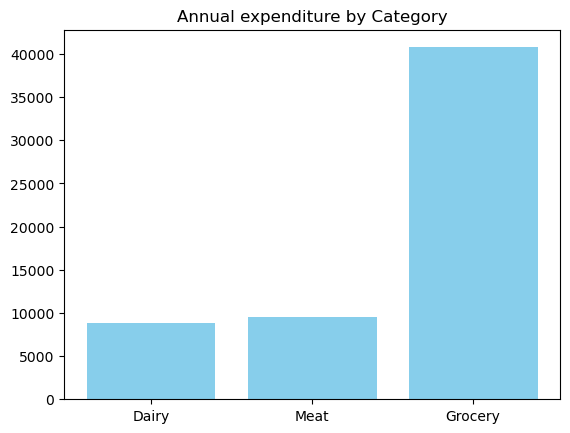

In [252]:
annual_expenditure_pd = annual_expenditure.to_pandas()
plt.bar(annual_expenditure_pd["Category"], annual_expenditure_pd["annual expenditure"], color = "skyblue")
plt.title("Annual expenditure by Category")
plt.show()

# chart showing annual expenditure based on category